                                        Movie database

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [79]:
import pandas as pd
import unicodecsv
from pprint import pprint
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [80]:
all_movies= pd.read_csv('tmdb-movies.csv')
all_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [81]:
all_movies.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [82]:
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In this section, we want to explore trends over time. 

So, we are using group by function to collect all the movies data based on release years Thus, all the records pertaining to each year will be clubbed together.

Our variables of interest are runtimes, revenue, popularity and are all numeric.Hence, we can take the mean values for each group under each year using the mean function.



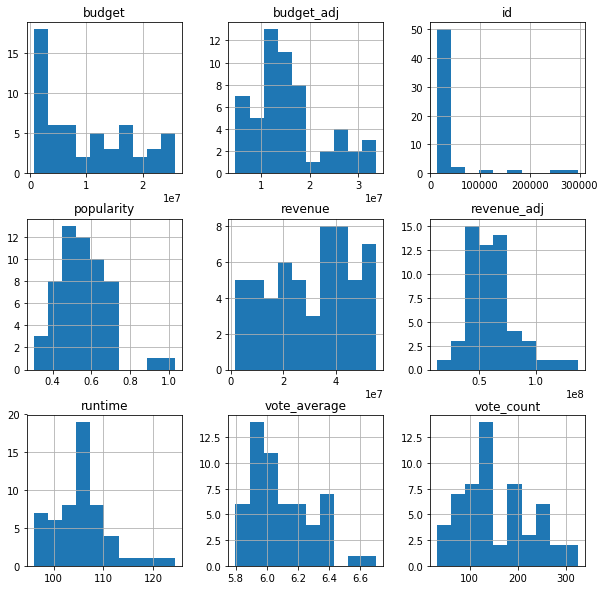

In [83]:
all_movies.groupby('release_year').mean().hist(figsize=(10,10))
plt.show()


release_year vs popularity.

here we will see how many movies(mean) are watched each year.

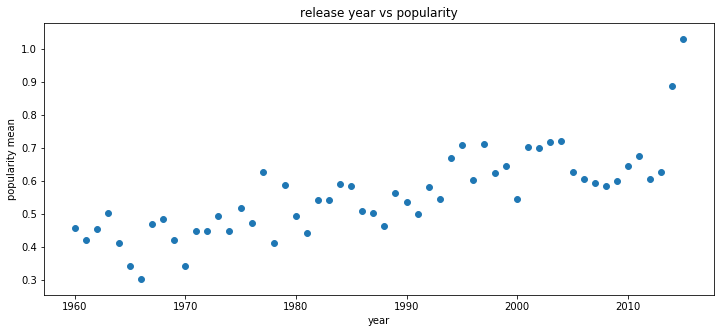

In [84]:
release=all_movies.groupby('release_year').mean()['popularity']
plt.rcParams["figure.figsize"] = [12,5]
plt.scatter(range(1960,2016),release,s=35)
plt.xlabel('year')
plt.ylabel('popularity mean')
plt.title('release year vs popularity')
plt.show()

we can see that with the increase in year the popularity of movies has increased.

We can also conclude that movies has gained more attration of the people with the increase in year.

In [85]:
def read_file():
    with open('tmdb-movies.csv','rb') as f:
        reader=unicodecsv.DictReader(f)
        return list(reader)
   
   

In [86]:
movies=read_file()
pprint(movies[2])

OrderedDict([('id', '262500'),
             ('imdb_id', 'tt2908446'),
             ('popularity', '13.112507'),
             ('budget', '110000000'),
             ('revenue', '295238201'),
             ('original_title', 'Insurgent'),
             ('cast',
              'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles '
              'Teller'),
             ('homepage', 'http://www.thedivergentseries.movie/#insurgent'),
             ('director', 'Robert Schwentke'),
             ('tagline', 'One Choice Can Destroy You'),
             ('keywords',
              'based on novel|revolution|dystopia|sequel|dystopic future'),
             ('overview',
              'Beatrice Prior must confront her inner demons and continue her '
              'fight against a powerful alliance which threatens to tear her '
              'society apart.'),
             ('runtime', '119'),
             ('genres', 'Adventure|Science Fiction|Thriller'),
             ('production_companies',
       

In [87]:
def parse_maybe_int(data):
    if data=='':
        return None
    else:
        return int(data)
def parse_date(date):
    if date=='':
        return None
    else:
        return datetime.strptime(date,'%m/%d/%y')

In [88]:
def data_type():
    for movie in movies:
        movie['id']=parse_maybe_int(movie['id'])
        movie['budget']=parse_maybe_int(movie['budget'])
        movie['revenue']=parse_maybe_int(movie['revenue'])
        movie['runtime']=parse_maybe_int(movie['runtime'])
        movie['release_date']=parse_date(movie['release_date'])
        movie['vote_count']=parse_maybe_int(movie['vote_count'])
        movie['release_year']=parse_maybe_int(movie['release_year'])
        movie['budget_adj']=float(movie['budget_adj'])
        movie['revenue_adj']=float(movie['revenue_adj'])
        movie['vote_average']=float(movie['vote_average'])
        movie['popularity']=float(movie['popularity'])


In [89]:
data_type()
movies[2]

OrderedDict([('id', 262500),
             ('imdb_id', 'tt2908446'),
             ('popularity', 13.112507),
             ('budget', 110000000),
             ('revenue', 295238201),
             ('original_title', 'Insurgent'),
             ('cast',
              'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller'),
             ('homepage', 'http://www.thedivergentseries.movie/#insurgent'),
             ('director', 'Robert Schwentke'),
             ('tagline', 'One Choice Can Destroy You'),
             ('keywords',
              'based on novel|revolution|dystopia|sequel|dystopic future'),
             ('overview',
              'Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart.'),
             ('runtime', 119),
             ('genres', 'Adventure|Science Fiction|Thriller'),
             ('production_companies',
              'Summit Entertainment|Mandeville Films|Red Wagon Enter

In [90]:
all_cast=set()
new_movies = all_movies[all_movies['cast'].notnull()]
for _,row in new_movies.iterrows():
        for data in row['cast'].split('|'):
            all_cast.add(data)


Q: the most popular cast ?

In [91]:
count_cast=dict.fromkeys(all_cast,0)
for _,row in new_movies.iterrows():
    for data in row['cast'].split('|'):
         if data in all_cast:
            count_cast[data]+=1    
actors_df=pd.DataFrame(count_cast,index=['count'])

In [92]:
 def popular_cast():
    max_count=actors_df.max(axis='columns')
    for key,value in count_cast.items():
         if int(max_count)==value:
            most_popular_actor=key
            total_movies=value
    print("actor : {}, total movies : {}".format(most_popular_actor,total_movies))
popular_cast()

actor : Robert De Niro, total movies : 72


Q: director with maximum movies ?

In [93]:
def popular_director():
    temp=all_movies.groupby('director').size()
    maximum=all_movies.groupby('director').size().max()
    for key,value in temp.items():
        if value==maximum:
            print ("director : {}, total movies : {} ".format(key,value))
popular_director()

director : Woody Allen, total movies : 45 


Q: movie with the highest budget?

In [94]:
#highest budget movie
print(all_movies[all_movies['budget']==all_movies['budget'].max()]['original_title'])


2244    The Warrior's Way
Name: original_title, dtype: object


Q: movie with the highest revenue?

In [95]:
#highest revenue movie
print(all_movies[all_movies['revenue'] == all_movies['revenue'].max()]['original_title'])

1386    Avatar
Name: original_title, dtype: object


In [96]:
#movie with the highest earnings?
def profit():
    all_movies['profit']=all_movies['revenue']-all_movies['budget']
    movie=all_movies[all_movies['profit']==all_movies['profit'].max()]
    print("profit : {}   movie : {} "\
      .format(all_movies['profit'].max(),movie.loc[:,'original_title']))
profit()

profit : 2544505847   movie : 1386    Avatar
Name: original_title, dtype: object 


Q: year in which maximum movies were released?

In [97]:
def maximum_movie_released():
    temp=all_movies.groupby('release_year').size()
    maximum=all_movies.groupby('release_year').size().max()
    for key,value in temp.items():
        if value==maximum:
            print ("year : {}, total movies : {} ".format(key,value))
maximum_movie_released()

year : 2014, total movies : 700 


Which genres are most popular from year to year?

In [98]:
movies_genres = all_movies[["id", "original_title","release_year", "genres"]].reset_index(drop = True)
movies_genres.head()

,id,original_title,release_year,genres
0,135397,Jurassic World,2015,Action|Adventure|Science Fiction|Thriller
1,76341,Mad Max: Fury Road,2015,Action|Adventure|Science Fiction|Thriller
2,262500,Insurgent,2015,Adventure|Science Fiction|Thriller
3,140607,Star Wars: The Force Awakens,2015,Action|Adventure|Science Fiction|Fantasy
4,168259,Furious 7,2015,Action|Crime|Thriller


In [99]:
movies_genres[['genre1', 'genre2', 'genre3', 'genre4', 'genre5']] = movies_genres['genres'].str.split(
    "|", expand = True)
del movies_genres['genres']

In [100]:
movies_genres = pd.melt(movies_genres, id_vars = ["id", "original_title","release_year"],
                       value_name = "genres", var_name = "genre_n")

# Drop rows with no values in genres column
movies_genres.dropna(axis = 0, subset = ['genres'], inplace = True)

movies_genres.head()

,id,original_title,release_year,genre_n,genres
0,135397,Jurassic World,2015,genre1,Action
1,76341,Mad Max: Fury Road,2015,genre1,Action
2,262500,Insurgent,2015,genre1,Adventure
3,140607,Star Wars: The Force Awakens,2015,genre1,Action
4,168259,Furious 7,2015,genre1,Action


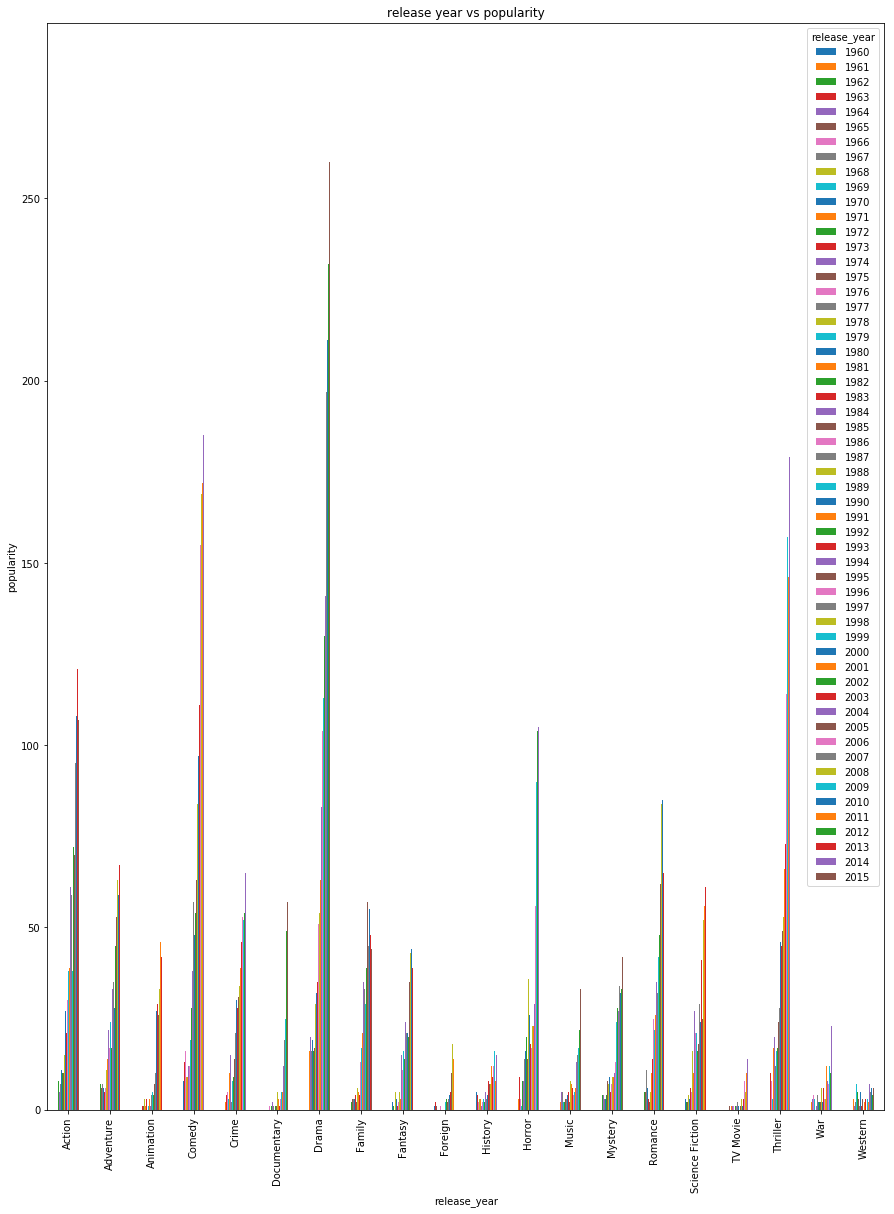

In [101]:
change_over_time=movies_genres.groupby(['release_year','genres']).size()
plt.rcParams["figure.figsize"] = [15,20]
change_over_time.unstack().T.plot(kind='bar')
plt.xlabel('release_year')
plt.ylabel('popularity')
plt.title('release year vs popularity')
plt.show()

Observation:

drama is the most popular genres at an approx.


limitations:

-> The medium through which popularity was determined is unknown. This can impact the analysis as the limitations and bias inherent while gauging audience response will be present in the end values too.

-> This analysis assumes that the same index and methods were employed for collecting popularity factors and counting votes for all movies. In the event that it is not so, the results might not hold true. [a possibility since movies are from different countries and languages]

-> just considering genres for making new movie may not work out as it depends on the script and the audience responses. 

-> we have considered only the movies but we also have TV shows, thus telling which genres is most popular based on only movies will be incorrect.

conclusions:

-> the most popular genres from year to year is drama.

-> the highest earning movie is avatar which means that action movies are the most loved ones.